# TP Datavisualisation


## Exercice 1 : House_pricing

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
      LotArea  SalePrice
0        8450     208500
1        9600     181500
2       11250     223500
3        9550     140000
4       14260     250000
...       ...        ...
1455     7917     175000
1456    13175     210000
1457     9042     266500
1458     9717     142125
1459     9937     147500

[1460 rows x 2 columns]


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


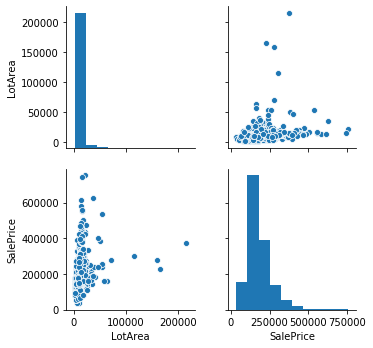

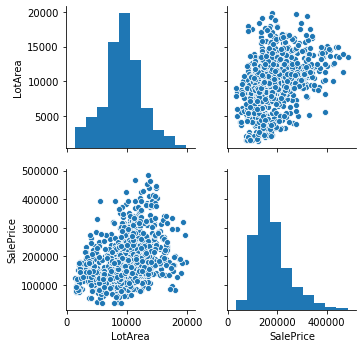

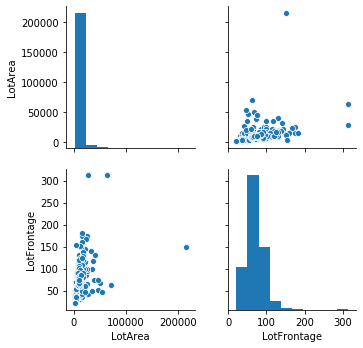

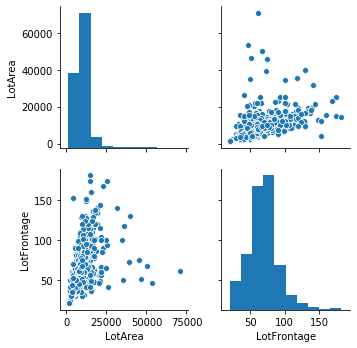

In [161]:

#Question 1
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sb

#Question 2
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

dataset = pd.read_csv("./house_pricing.csv")
print(dataset.dtypes)
#Toutes les variables sont quantitatives, à l'exception de l'index qui est toujours une variable discrète

#Question 3
graphe1 = dataset[["LotArea","SalePrice"]]
print(graphe1)
sb.pairplot(graphe1)

#Question 4
graphe1_filtered = graphe1[(graphe1['LotArea'] < 20000) & (graphe1['SalePrice'] < 500000)]
sb.pairplot(graphe1_filtered)

#Question 5
graphe2 = dataset[["LotArea","LotFrontage"]]
sb.pairplot(graphe2)

#Question 6
graphe2_filtered = graphe2[(graphe2['LotFrontage'] < 200) & (graphe2['LotArea'] < 100000)]
sb.pairplot(graphe2_filtered)


## Exercice 2 : sales_predictions

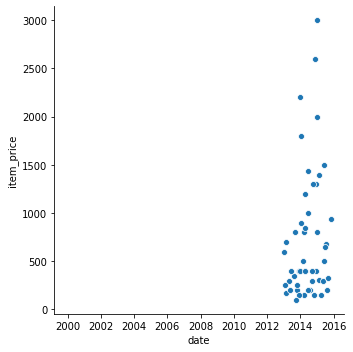

In [163]:
#Question 1
import numpy as np
import seaborn as sb
import matplotlib as mp
import pandas as pd

#Question 2
dataset=pd.read_csv('./sales_predictions.csv')
#sb.relplot(x="date", y="item_price", data=dataset, size=())
#Les prix croissent en fonction du temps, plus le temps passe plus les prix augmentent.

#Question 3
echantillon = dataset.sample(n=50)

#Question 4
#sb.relplot(x="date", y="item_price", data=echantillon, height=6, aspect=3)
#Le graphe est illisible car les dates sont mal converties

#Question 5
echantillon['date'] = pd.to_datetime(echantillon['date'], format='%d.%m.%Y')
sb.relplot(x="date", y="item_price", data=echantillon, height=6, aspect=3)



## Exercice 3

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

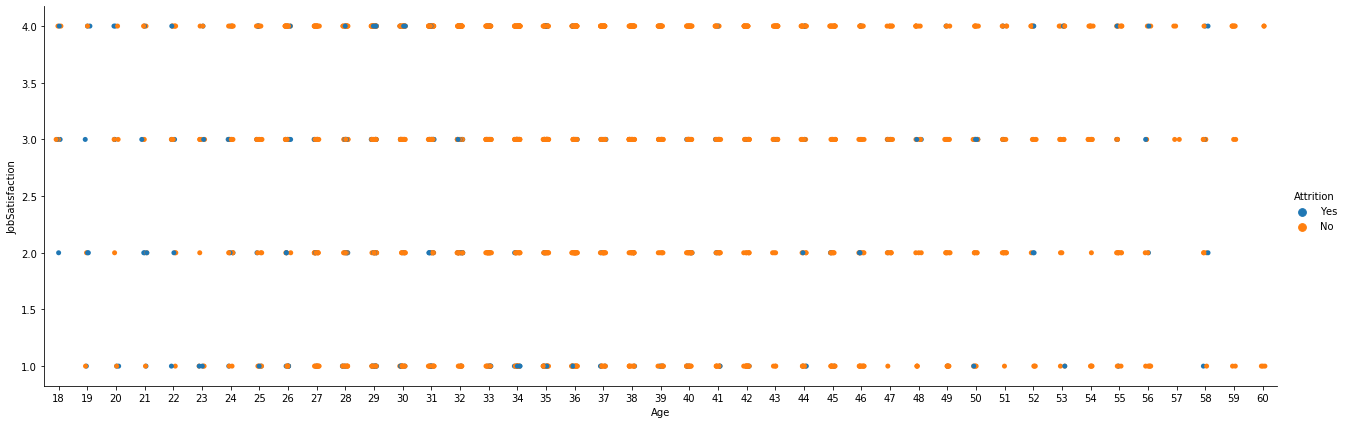

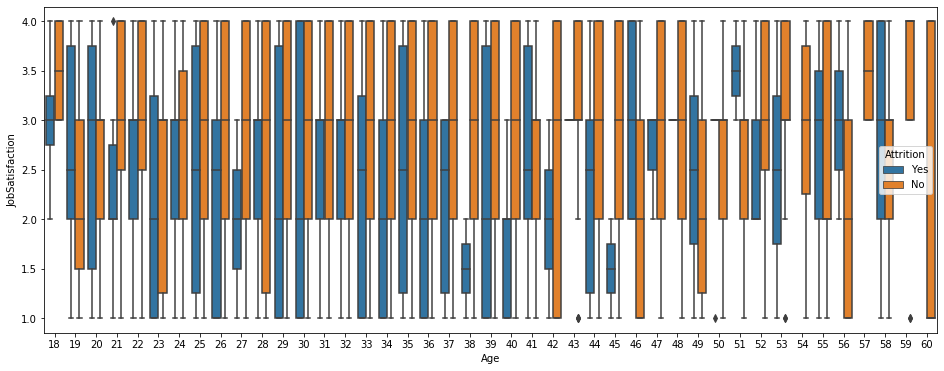

In [160]:
#Question 1
import numpy as np
import seaborn as sb
import matplotlib as mp
import pandas as pd

#Question 2
dataset=pd.read_csv('./IBM_HR_ATTRITION.csv')
sb.catplot(x="Age", y="JobSatisfaction", hue="Attrition", data=dataset, height=6, aspect=3)

#Question 3
mp.pyplot.figure(figsize=(16, 6))
sb.boxplot(x="Age", y="JobSatisfaction", hue="Attrition", data=dataset)
#Ceux qui quittent l'entreprise sont majoritairement ceux qui ne sont pas satisfaits par leur travail

#Question 4
#Oui, les valeurs aberrantes sont les valeurs qui sont au delà même des branches des moustaches

#Question 5
#Ce sont les points sur le graphique, Jean-michel a 21 ans, a dit qu'il adorait son travail (4/4) mais est parti quand même par exemple

dataset['JobSatisfaction'].describe()

## Exercice 4

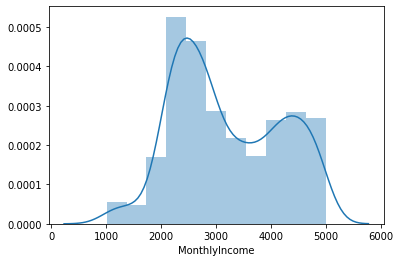

In [116]:
#Question 1
import numpy as np
import seaborn as sb
import matplotlib as mp
import pandas as pd

#Question 2
dataset = pd.read_csv('./IBM_HR_ATTRITION.csv')
#sb.distplot(dataset['MonthlyIncome'])

#Question 3
filtered_dataset = dataset[dataset['MonthlyIncome'] < 5000]

#print(filtered_dataset)
sb.distplot(filtered_dataset['MonthlyIncome'])


## Exercice 5

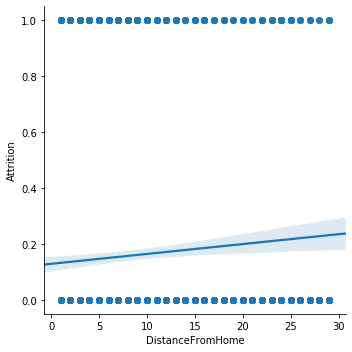

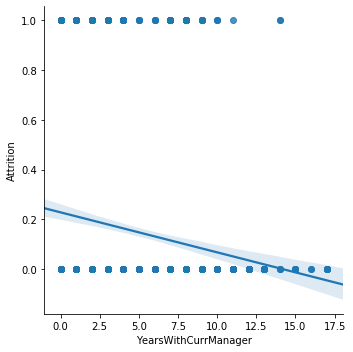

In [131]:
#Question 1
import numpy as np
import seaborn as sb
import matplotlib as mp
import pandas as pd

#Question 2
dataset = pd.read_csv('./IBM_HR_ATTRITION.csv')
dataset['Attrition'] = dataset['Attrition'].apply(lambda x: 1 if x == "Yes" else 0)
sb.lmplot(x="DistanceFromHome",y="Attrition", data=dataset)
#La probabilité de partir semble augmenter plus la distance qui sépare l'entreprise de la maison augmente

#Question 3
sb.lmplot(x="YearsWithCurrManager",y="Attrition", data=dataset)
#En revanche, elle semble diminuer plus on reste longtemps avec le manager

## Exercice 6

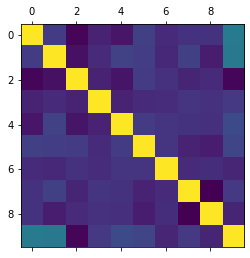

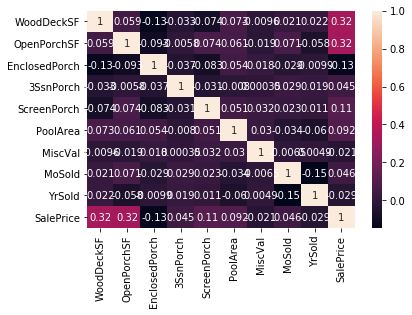

In [159]:
#Question 1
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sb

#Question 2
dataset = pd.read_csv("./house_pricing.csv")
dataset = dataset[dataset.columns[-15:]]

#Question 3
correlationMatrix = dataset.corr()
mp.pyplot.matshow(correlationMatrix)
mp.pyplot.show()

#Question 4
sb.heatmap(correlationMatrix, annot=True)

#Question 5
#Pour prédire le prix, on regarde les variables les pus influentes ( celles avec le plus gros coef dans la colonne du prix)
#Il s'agit du WoodDeckSF, du OpenPorchSF et le ScreenPorch
